# 基于动态时间扭曲的K近邻聚类算法的使用样例

1. 导入所需的库

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from typing import Tuple

# 导入K近邻算法模块
from pysdkit.models import KNN

2. 生成用于测试K近邻算法的数据

In [72]:
def random_rotate_subspace(X, dims=(0, 1)):
    """X: shape [n_samples, n_features]"""
    d1, d2 = dims
    n_samples = X.shape[0]
    angles = np.random.uniform(0, 2 * np.pi, size=n_samples)
    cos, sin = np.cos(angles), np.sin(angles)
    X_rot = X.copy()
    X_rot[:, d1] = cos * X[:, d1] - sin * X[:, d2]
    X_rot[:, d2] = sin * X[:, d1] + cos * X[:, d2]
    return X_rot


def test_knn_data(n_classes: int = 5, number: int = 10, length: int = 256, random_state: int = 42) -> Tuple[
    np.ndarray, np.ndarray]:
    """
    生成用于测试K近邻算法的函数

    :param n_classes: 用于测试的类别数目
    :param length: 生成测试数据的长度
    :param random_state: 测试使用的随机种子
    :return: 生成的测试时间序列数据样本和标签
    """
    rng = np.random.RandomState(random_state)
    samples, labels = [], []

    for c in range(n_classes):
        # 生成该类别的均值和方差
        mean = rng.uniform(low=-10, high=10)
        noise = rng.normal(loc=mean, scale=1, size=length)
        for i in range(number):
            samples.append(rng.rand(length) * mean + noise)
            labels.append(c)

    return random_rotate_subspace(np.array(samples)), np.array(labels)


# 生成用于训练的数据
samples, labels = test_knn_data(n_classes=4, number=10, length=128, random_state=42)
# 打印训练样本的形状
print("training X", samples.shape)
print("training y", labels.shape)

# 生成用于测试的数据
test_samples, test_labels = test_knn_data(n_classes=2, number=1, length=128, random_state=42)
# 打印测试数据的形状
print("testing X", test_samples.shape)
print("testing y", test_labels.shape)

training samples (40, 128)
training labels (40,)
testing samples (2, 128)
testing labels (2,)


3. 创建基于动态时间扭曲的K近邻分类器实例

In [73]:
knn = KNN()
knn.fit(samples, labels)

4. 执行K近邻算法得到分类结果和该结果的概率

In [80]:
(pred, prob) = knn.predict(test_samples)

print(f"测试样本属于类别: {pred}")
print(f"属于该类别的概率是: {prob}")

测试样本属于类别: [0 2]
属于该类别的概率是: [1. 1.]


5. 导入PCA主成分分析算法用于降维可视化

In [81]:
from pysdkit.models import PCA

pca = PCA(n_components=2)
samples_decom = pca.fit_transform(samples)
print(samples_decom.shape)

(40, 2)


6. 可视化分类结果

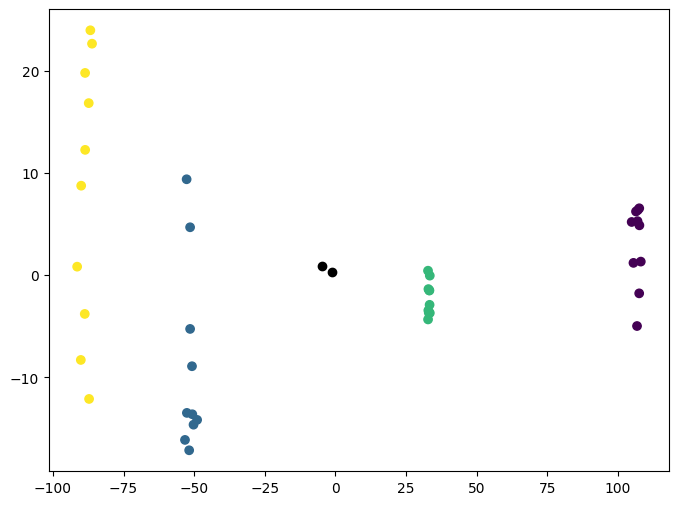

In [85]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(samples_decom[:, 0], samples_decom[:, 1], c=labels)
ax.scatter(test_samples[:, 0], test_samples[:, 1], color="k")